In [4]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

(x_train_src, y_train_src), (x_valid_src, y_valid_src) = fashion_mnist.load_data()
#Нормализуем данные
x_train = x_train_src.astype('float32') / 255.
x_valid = x_valid_src.astype('float32') / 255.
#Преобразуем к формату (28, 28, 1) (Длинна, ширина, канал)
x_train = np.reshape(x_train, (len(x_train), 28*28))
x_test  = np.reshape(x_valid,  (len(x_valid),  28*28))




In [42]:
nn_neurons = 1000
# Инициируем RBM
rbm = BernoulliRBM(n_components=nn_neurons, batch_size=128, n_iter=20, verbose=1)
rbm.fit(x_train, x_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -240.82, time = 36.09s


KeyboardInterrupt: 

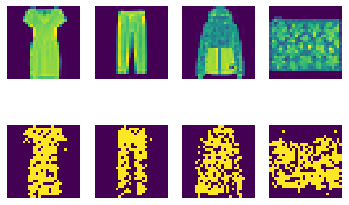

In [41]:
import matplotlib.pyplot as plt

#
samples = x_train[20:30].copy()
gibbs = rbm.gibbs(samples)
gibbs = gibbs.reshape(len(samples), 28, 28)
samples = samples.reshape(len(samples), 28, 28)

def show_results(input, output, n):
    fig, axs = plt.subplots(2, n)
    for i in range(0, n):
        axs[0, i].imshow(input[i])
        axs[0, i].axis('off')
        axs[1, i].imshow(output[i])
        axs[1, i].axis('off')
show_results(samples, gibbs, 4)



In [65]:
class out_rbm():
    def __init__(self, rbm):
        self.rbm = rbm
    def fit(self, x, y):
        return self.rbm.fit(x, y)
    def predict(self, x):
        return self.rbm.gibbs(x)

nn_neurons = 1600
epochs = 5
rbm_1 = BernoulliRBM(n_components=nn_neurons, batch_size=128, n_iter=epochs, verbose=1)
rbm_2 = BernoulliRBM(n_components=nn_neurons, batch_size=128, n_iter=epochs, verbose=1)
rbm_3 = out_rbm(BernoulliRBM(n_components=45, batch_size=128, n_iter=epochs, verbose=1))

stacked_machine = Pipeline(steps=[
    ('rbm_1',rbm_1),
    ('rbm_2',rbm_2),
    ('rbm_3',rbm_3),
], verbose=1)

stacked_machine.fit(x_train, x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -243.76, time = 51.37s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -228.69, time = 66.50s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -222.46, time = 67.16s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -215.99, time = 69.45s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -212.13, time = 69.33s
[Pipeline] ............. (step 1 of 3) Processing rbm_1, total= 5.7min
[BernoulliRBM] Iteration 1, pseudo-likelihood = -261.95, time = 109.15s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -252.96, time = 131.94s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -254.30, time = 124.76s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -252.01, time = 127.37s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -249.62, time = 136.27s
[Pipeline] ............. (step 2 of 3) Processing rbm_2, total=11.0min
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.90, time = 6.98s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -347.64, time = 9.15s
[Be

Pipeline(memory=None,
         steps=[('rbm_1',
                 BernoulliRBM(batch_size=128, learning_rate=0.1,
                              n_components=1600, n_iter=5, random_state=None,
                              verbose=1)),
                ('rbm_2',
                 BernoulliRBM(batch_size=128, learning_rate=0.1,
                              n_components=1600, n_iter=5, random_state=None,
                              verbose=1)),
                ('rbm_3', <__main__.out_rbm object at 0x000001D7011009C8>)],
         verbose=1)

[[[False False False ... False False  True]
  [ True False False ... False False False]
  [False False  True ... False False False]
  ...
  [False  True False ... False  True False]
  [False  True  True ... False False False]
  [False False False ... False  True False]]

 [[False False  True ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False  True ... False False False]
  [False False False ... False False False]]

 [[False False False ...  True False False]
  [False False False ... False False False]
  [False  True False ...  True False False]
  ...
  [False False False ... False False False]
  [ True False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False  True False ... False False False]
  [ True False  True ... False False False]
  ...
  [ True False False ... False False Fal

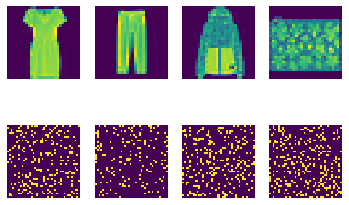

In [67]:
samples = x_train[20:30].copy()
gibbs = stacked_machine.predict(samples)
gibbs = gibbs.reshape(len(samples), 40, 40)
samples = samples.reshape(len(samples), 28, 28)
show_results(samples, gibbs, 4)

print(gibbs)